<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_bcw_dataset.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab: BCW dataset

PCA of breast cancer Wisconsin dataset.

### References

* [Raschka's ch05.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch05/ch05.ipynb) -- github
* [Raschka's ch06.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb) -- github
* [Information about the dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) -- uci.edu


In [ ]:
# Cell #3 from Raschka's ch06.ipynb
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Cell 5 from ch06.ipynb
# Column 1 of original data is either "M" (malignant) or "B" (benign)
# LabelEncoder transforms these categorical values to integers (0,1)
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
# Cell 7 from ch06.ipynb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [ ]:
print(X.shape)
print(X_test.shape)

(569, 30)
(114, 30)


In [ ]:
# Cell 8 from Raschka's ch06.ipynb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=4),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


eigen_vals.shape: (30,)
eigen_vecs.shape: (30, 30)


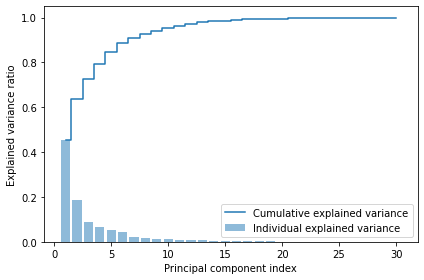

In [ ]:
# Explained variance plot
# ch05.ipynb (cells 6,7,8,9 with only slight modification)
import numpy as np
import matplotlib.pyplot as plt

X_train_std = StandardScaler().fit_transform(X_train)
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('eigen_vals.shape:', eigen_vals.shape)
print('eigen_vecs.shape:', eigen_vecs.shape)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 31), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 31), cum_var_exp, where='mid',
          label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

(30, 2)
Matrix W:
 [[-0.21679334 -0.23462306]
 [-0.10660312 -0.06849448]
 [-0.22557851 -0.2151757 ]
 [-0.21886594 -0.23224295]
 [-0.14066045  0.1848655 ]
 [-0.23936605  0.14475358]
 [-0.25444238  0.06573624]
 [-0.25775276 -0.03731318]
 [-0.14120408  0.18138941]
 [-0.07237829  0.3662257 ]
 [-0.20600989 -0.09883883]
 [-0.01378187  0.0763412 ]
 [-0.21367988 -0.07861921]
 [-0.20798454 -0.15183423]
 [-0.00307547  0.2049454 ]
 [-0.17102664  0.2377156 ]
 [-0.14768555  0.20931191]
 [-0.18439201  0.1409671 ]
 [-0.04163771  0.19936217]
 [-0.10122214  0.2828757 ]
 [-0.226975   -0.22124091]
 [-0.10755498 -0.06136208]
 [-0.23567844 -0.20066026]
 [-0.2237171  -0.22093973]
 [-0.12867934  0.15776067]
 [-0.21426764  0.13415898]
 [-0.2282569   0.09876787]
 [-0.24993858 -0.00967411]
 [-0.12582219  0.13847033]
 [-0.13879824  0.26770452]]


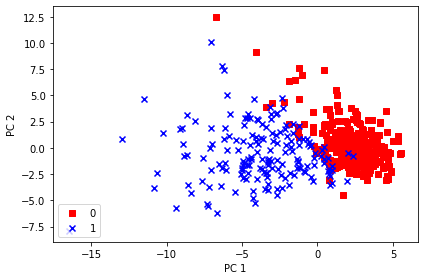

In [ ]:
# Data projected on first two eigenvectors
# Cell 10 from Rachka ch05.ipynb
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Cell 11 from Raschka ch05.ipynb
# This pulls out the first two eigenvectors from the sorted list
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print(w.shape)
print('Matrix W:\n', w)

# Cell 13 from Raschka ch05.ipynb
#X_train_pca = X_train_std.dot(w)
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()